<a href="https://colab.research.google.com/github/pragya0151/AIMLMonth2023/blob/main/Exoplanet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exoplanet Detection using Machine Learning**

# **Introduction**
**Exoplanet Detection**:

Exoplanet detection involves identifying the presence of planets orbiting stars based on various observable signals, such as changes in brightness (transits) or radial velocity variations. Machine learning can enhance the efficiency and accuracy of detecting exoplanets in large datasets.

**The Transit Method of Detecting Extrasolar Planets**

When a planet passes in front of a star as viewed from Earth, the event is called a “transit”. On Earth, we can observe an occasional Venus or Mercury transit. These events are seen as a small black dot creeping across the Sun—Venus or Mercury blocks sunlight as the planet moves between the Sun and us. Kepler finds planets by looking for tiny dips in the brightness of a star when a planet crosses in front of it—we say the planet transits the star.

Once detected, the planet's orbital size can be calculated from the period (how long it takes the planet to orbit once around the star) and the mass of the star using Kepler's Third Law of planetary motion. The size of the planet is found from the depth of the transit (how much the brightness of the star drops) and the size of the star. From the orbital size and the temperature of the star, the planet's characteristic temperature can be calculated. From this the question of whether or not the planet is habitable (not necessarily inhabited) can be answered.



# **Problem statement**
ML algorithms can be trained to identify transit-like patterns in light curves. These algorithms learn to differentiate between actual transits and noise, helping to detect exoplanet candidates more effectively.

**about the Dataset:**  

The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.

As you can imagine, planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.

link: https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data?resource=download&select=exoTrain.csv

In [ ]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')




In [ ]:
#getting the idea about dataset
train_data = pd.read_csv('/content/exoTrain.csv.zip')
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
#shape of dataset
train_data.shape

(5087, 3198)

This dataset has 5087 stars. For each star we have 3187 flux values at different time intervals.

As this dataset has data containing data based on transit method for detecting exoplanets, these flux values will be used to detect if a star has exoplanest(s)

In [ ]:
#checking for rows with null values and displaying them
train_data.isnull().sum()


LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

<Axes: >

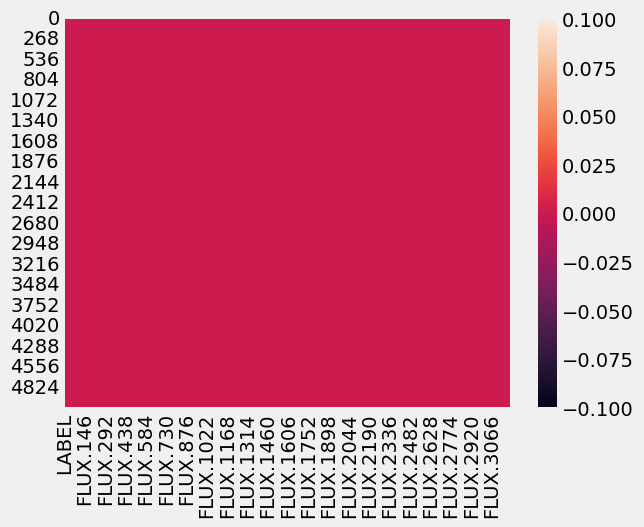

In [ ]:
sns.heatmap(train_data.isnull())

there are no missing values

In [ ]:
#checking how many labels are present in the dataset
train_data['LABEL'].unique()

array([2, 1])

hence there are 2 labels:
1.   for star not containing exoplanets
2.   for star containing exoplanets





In [ ]:
#Replacing the label values
train_data = train_data.replace({'LABEL' : {1:0, 2:1}})
train_data['LABEL'].unique()



array([1, 0])

we have replaced the values from 2,1 to 1,0 respectively as its much better to use values 0,1 for classification

no. of stars with exoplanets= 37
no. of stars without exoplanets= 5050


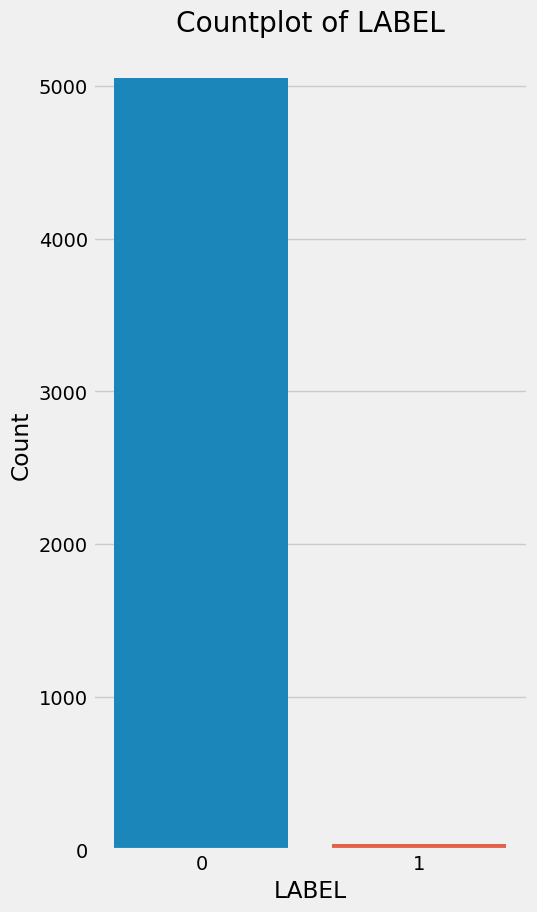

In [ ]:
print("no. of stars with exoplanets=",len(train_data[train_data['LABEL']==1]))
print("no. of stars without exoplanets=",len(train_data[train_data['LABEL']==0]))
#plotting a countplot
column_name = 'LABEL'
plt.figure(figsize=(5, 10))

sns.countplot(data=train_data, x=column_name)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Countplot of {column_name}')

# Show the plot
plt.show()


**Visualising the light curves in this data**

When a planet passes between an observer and the star, the flux value decreases and hence we see a dip in light curves with exoplanets


In [ ]:
#dropping the label column as we dont need it for plotting the light curve
plot_train=train_data.drop(["LABEL"],axis=1)
plot_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


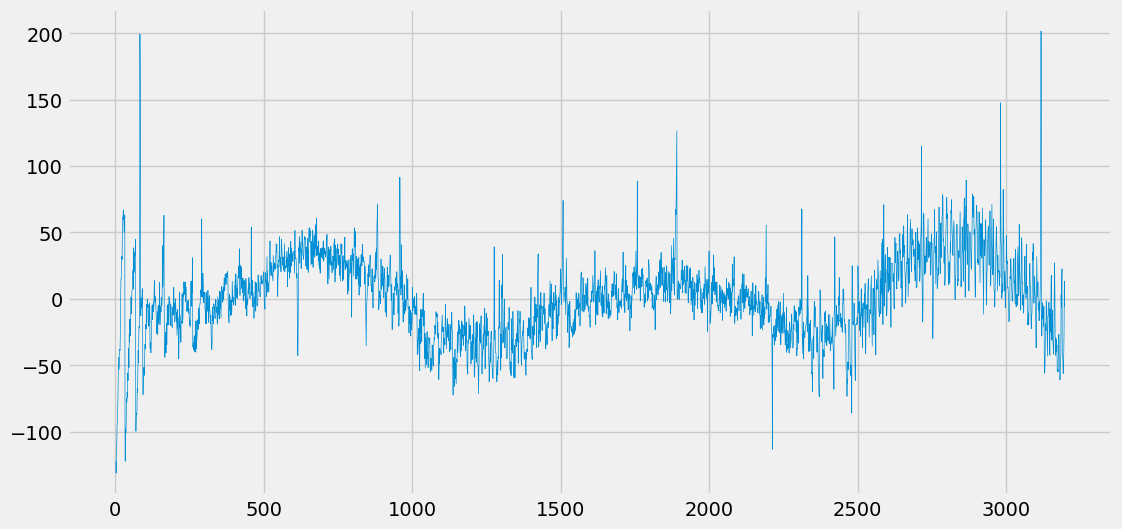

In [ ]:
#plotting a star with confirmed exoplanets i.e. having label as 1 to visualize how the light curve of a star with exoplanet looks like
x=range(1,3198)
y=plot_train.iloc[16,:].values
plt.figure(figsize=(12, 6))
plt.plot(x,y,linewidth=0.5)

the dips in the above graphs represents the dimming of the flux (the light intensity). This is evidence that there may be an orbiting body i.e. exoplanet around the star. this type of graph with dips in flux is common with all the stars who are confirmed canditates

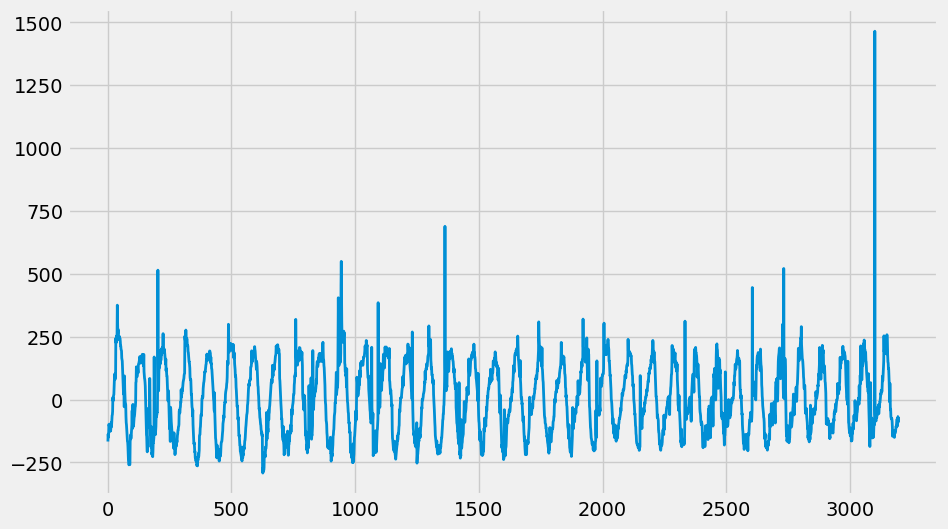

In [ ]:
#plotting a star with no exoplanets i.e. having label as 0 to visualize how the light curve of a star without exoplanet looks like
x=range(1,3198)
y=plot_train.iloc[40,:].values
plt.figure(figsize=(10, 6))
plt.plot(x,y,linewidth=2)

there are no dips in the above graphs representing the dimming of the flux (the light intensity).This graph is 'flatter' compared to the previous group. This is evidence that there is no orbiting body i.e. exoplanet around the star which will cause the dimming of the flux.

In the scenario where you want to predict whether a star has exoplanets or not based on flux values, it would be more appropriate to use classification rather than regression.

# **Data preprocessing**

In [ ]:
#Extracting independent (x) and dependent (y) features from our dataset
x=train_data.drop(["LABEL"], axis=1)
y=train_data.LABEL

**Handling the imbalance in the data:**

our dataset is imbalanced, where one class(label=0) has significantly more samples than the others, the classifier can be biased towards the majority class.

The Random Over-Sampling technique focuses on the minority class (the class with fewer samples) and aims to balance the class distribution by randomly duplicating instances from the minority class until its size matches the size of the majority class.

Random Over-Sampling process works:

    Identify the minority class that you want to balance.

    Randomly select instances from the minority class with replacement (allowing the same instance to be selected multiple times), adding these instances to the dataset.

    Repeat step 2 until the size of the minority class reaches the desired level of balance or matches the size of the majority class.

    Use the balanced dataset for training your machine learning model.

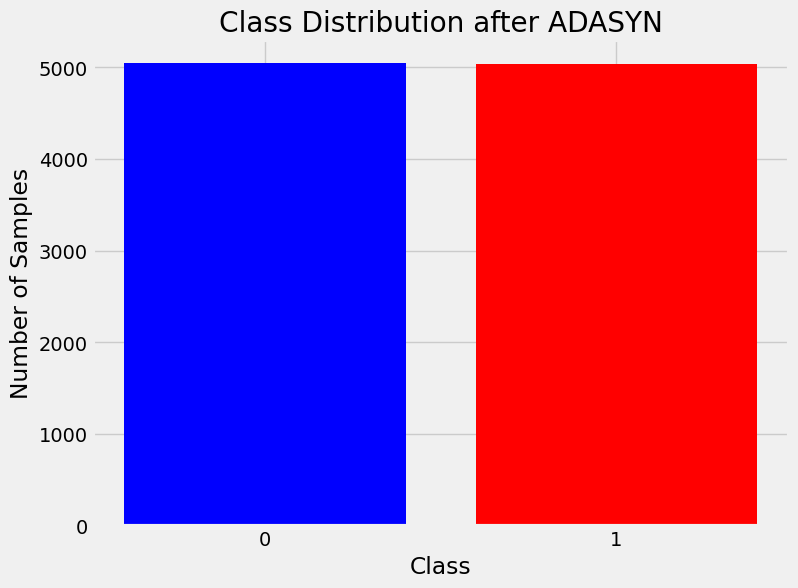

0    5050
1    5037
Name: LABEL, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv("/content/exoTrain.csv.zip")
data['LABEL'] = data['LABEL'].map({0: 0, 1: 1})

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(x, y)

# Count the number of samples in each class after ADASYN
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Plot the class distribution after ADASYN
plt.figure(figsize=(8, 6))
plt.bar(class_counts_resampled.index, class_counts_resampled.values, color=['blue', 'red'])
plt.xticks(class_counts_resampled.index, ['0', '1'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after ADASYN')
plt.show()

print(class_counts_resampled)



Splitting this data (70:30) into train and test data for our model development

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0)


Feature scaling to ensure all features are on a similar scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# **model selection**

in this project we are going to demonstrate 3 machine learning classification methods:

1.   K-Nearest Neighbors (KNN)
2.   Random forest classifier
3.   decision tree classifier

find which one gives the best results.



# **K-Nearest Neighbors (KNN)**

**train the K-Nearest Neighbors (KNN) model:**

1.   Import the KNeighborsClassifier class from scikit-learn.
2.   Create an instance of the K-Nearest Neighbors (KNN) and fit it to the training data.
3.   Use the fit method to train the model.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [ ]:
# Choosing K = 1
knn_classifier = KNC(n_neighbors=1,metric='minkowski',p=2)
#metric is to be by default minkowski for p = 2 to calculate the Eucledian distances
# Fit the model
knn_classifier.fit(X_train_sc, y_train)


KNeighborsClassifier(n_neighbors=1)

**Make Predictions**
    
1. Use the trained knn classifier to make predictions on the testing data.
2. Use the predict method to obtain the predicted labels.



In [ ]:
# Predict
y_pred_knn = knn_classifier.predict(X_test_sc)

**Evaluate the Model**
1.   Assess the performance of the knn model using evaluation metrics such as accuracy, precision, recall, and F1 score.
2.   Compare the predicted labels (y_pred) with the actual labels (y_test).



Validation accuracy of KNN is 0.992401717872481

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1501
           1       0.99      1.00      0.99      1526

    accuracy                           0.99      3027
   macro avg       0.99      0.99      0.99      3027
weighted avg       0.99      0.99      0.99      3027



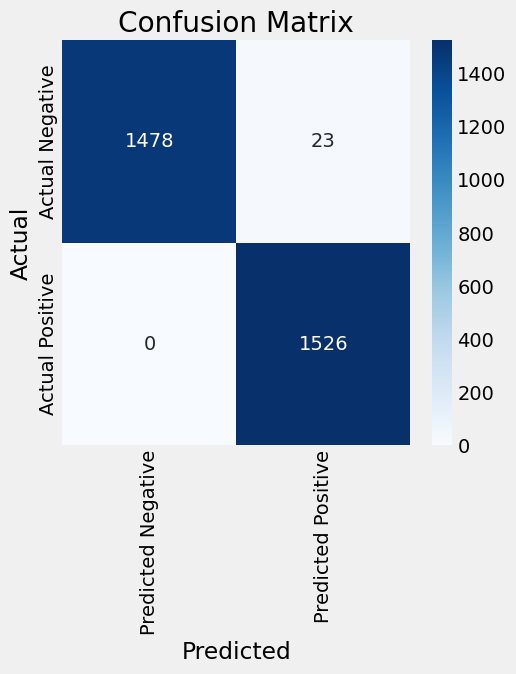

In [ ]:
# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Validation accuracy of KNN is', accuracy_score(y_test,y_pred_knn))
print ("\nClassification report :\n",(classification_report(y_test,y_pred_knn)))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Random forest classifier**

**train the Random forest classifier model:**

1.   Import the RandomForestClassifier class from scikit-ensemble.
2.   Create an instance of the Random forest classifier and fit it to the training data.
3.   Use the fit method to train the model.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, criterion='gini')
forest.fit(X_train_sc, y_train)

RandomForestClassifier()

**Make Predictions**
    
1. Use the trained Random forest classifier to make predictions on the testing data.
2. Use the predict method to obtain the predicted labels.



In [ ]:
# Predicting on the test set
y_pred_rf = forest.predict(X_test_sc)

**Evaluate the Model**
1.   Assess the performance of the Random forest  model using evaluation metrics such as accuracy, precision, recall, and F1 score.
2.   Compare the predicted labels (y_pred) with the actual labels (y_test).




Validation accuracy of RandomForestClassifier  is 0.9996696399074991

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1501
           1       1.00      1.00      1.00      1526

    accuracy                           1.00      3027
   macro avg       1.00      1.00      1.00      3027
weighted avg       1.00      1.00      1.00      3027



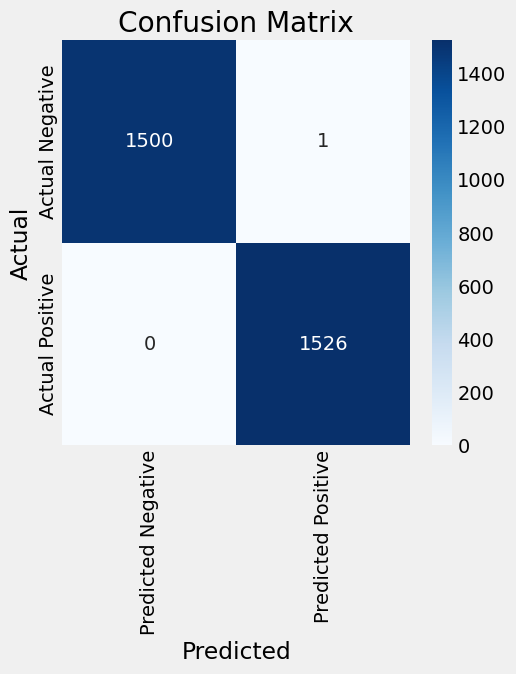

In [ ]:
# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('\nValidation accuracy of RandomForestClassifier  is', accuracy_score(y_test,y_pred_rf))
print ("\nClassification report :\n",(classification_report(y_test,y_pred_rf)))

#Confusion matrix
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **decision tree classifier**

**train the decision tree classifier model:**

1.   Import the RandomForestClassifier class from scikit-ensemble.
2.   Create an instance of the decision tree classifier and fit it to the training data.
3.   Use the fit method to train the model.  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training data
dt_classifier.fit(X_train_sc, y_train)



DecisionTreeClassifier(random_state=0)

**Make Predictions**
    
1. Use the trained decision tree classifier to make predictions on the testing data.
2. Use the predict method to obtain the predicted labels.



In [ ]:
y_pred_dt = dt_classifier.predict(X_test_sc)

**Evaluate the Model**
1.   Assess the performance of the decision tree classifier model using evaluation metrics such as accuracy, precision, recall, and F1 score.
2.   Compare the predicted labels (y_pred) with the actual labels (y_test).




Validation accuracy of DecisionTreeClassifier  is 0.9748926329699372

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1501
           1       0.97      0.98      0.98      1526

    accuracy                           0.97      3027
   macro avg       0.98      0.97      0.97      3027
weighted avg       0.98      0.97      0.97      3027



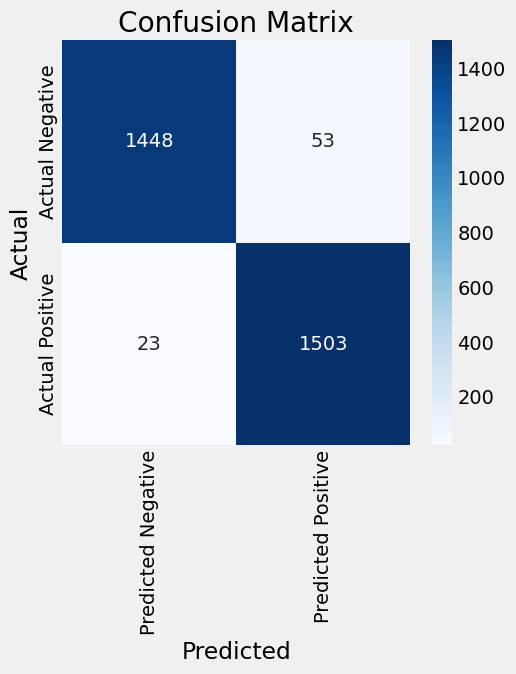

In [ ]:
# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('\nValidation accuracy of DecisionTreeClassifier  is', accuracy_score(y_test,y_pred_dt))
print ("\nClassification report :\n",(classification_report(y_test,y_pred_dt)))

#Confusion matrix
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Future Scope**

It's important to note that while machine learning offers powerful tools for exoplanet detection and classification, it also presents challenges related to dataset quality, overfitting, and model interpretability. Collaborations between astrophysicists, data scientists, and machine learning experts are crucial for developing robust and reliable models for exoplanet research. As the field continues to evolve, machine learning will likely play an increasingly integral role in our understanding of exoplanetary systems.